# Example of marginalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=np.random.normal(0,0.2,100)
y=np.random.normal(0.7,0.1,100)
z=np.hstack([x,y])

In [3]:
z2=np.random.normal(0.5,0.1,200)

In [4]:
z3=np.hstack([np.random.normal(-0.5,0.1,100),np.random.normal(-0.2,0.1,100)])

(array([ 1.,  5., 13., 29., 27., 20.,  3., 20., 58., 24.]),
 array([-0.60845039, -0.45555585, -0.30266132, -0.14976678,  0.00312775,
         0.15602229,  0.30891683,  0.46181136,  0.6147059 ,  0.76760043,
         0.92049497]),
 <a list of 10 Patch objects>)

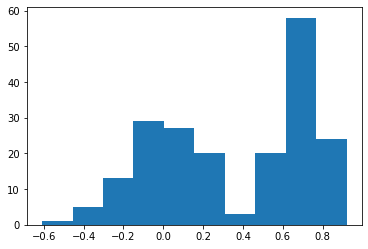

In [5]:
plt.hist(z)

In [6]:
from scipy import stats

In [7]:
kde=stats.gaussian_kde(z)

In [8]:
kde.covariance_factor()

0.3465724215775732

In [9]:
z_g=np.linspace(z.min(),z.max(),1000)

In [10]:
pdf=kde.evaluate(z_g)

(array([0.03270228, 0.1635114 , 0.42512965, 0.94836614, 0.88296157,
        0.65404561, 0.09810684, 0.65404561, 1.89673227, 0.78485473]),
 array([-0.60845039, -0.45555585, -0.30266132, -0.14976678,  0.00312775,
         0.15602229,  0.30891683,  0.46181136,  0.6147059 ,  0.76760043,
         0.92049497]),
 <a list of 10 Patch objects>)

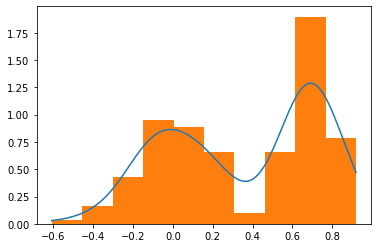

In [11]:
plt.plot(z_g,pdf)
plt.hist(z,density=True)

In [12]:
z_s=(z-z.mean())/(z.std())

0.9999999999999998


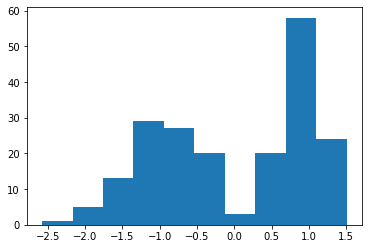

In [13]:
plt.hist(z_s)
print(z_s.std())

In [14]:
kde_s=stats.gaussian_kde(z_s)
kde_s.covariance_factor()

0.3465724215775732

In [15]:
z_gs=np.linspace(z_s.min(),z_s.max(),1000)
pdf_s=kde_s.evaluate(z_gs)

(array([0.01225776, 0.06128882, 0.15935092, 0.35547514, 0.33095961,
        0.24515527, 0.03677329, 0.24515527, 0.71095028, 0.29418632]),
 array([-2.573864  , -2.16595924, -1.75805448, -1.35014973, -0.94224497,
        -0.53434021, -0.12643545,  0.2814693 ,  0.68937406,  1.09727882,
         1.50518358]),
 <a list of 10 Patch objects>)

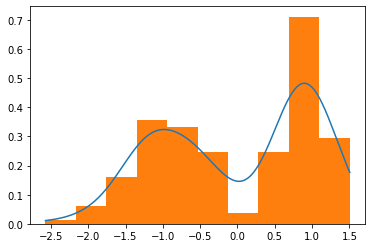

In [16]:
plt.plot(z_gs,pdf_s)
plt.hist(z_s,density=True)

In [17]:
kde_s.covariance_factor()

0.3465724215775732

In [18]:
kde_d=stats.gaussian_kde(z,bw_method=kde_s.covariance_factor())

In [19]:
pdf_d=kde_d.evaluate(z_g)

(array([0.03270228, 0.1635114 , 0.42512965, 0.94836614, 0.88296157,
        0.65404561, 0.09810684, 0.65404561, 1.89673227, 0.78485473]),
 array([-0.60845039, -0.45555585, -0.30266132, -0.14976678,  0.00312775,
         0.15602229,  0.30891683,  0.46181136,  0.6147059 ,  0.76760043,
         0.92049497]),
 <a list of 10 Patch objects>)

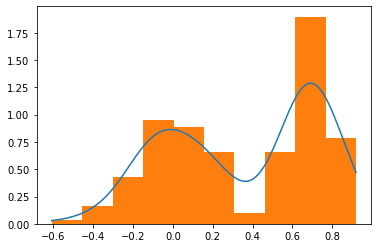

In [20]:
plt.plot(z_g,pdf_d)
plt.hist(z,density=True)

In [21]:
from sklearn.neighbors import KernelDensity

In [22]:
BW_1=0.3465724215775732*z.std()

In [23]:
kde_1d = KernelDensity(bandwidth = BW_1).fit(z[:, None])

In [24]:
pdf_k = np.exp(kde_1d.score_samples(z_g[:, None]))

(array([0.03270228, 0.1635114 , 0.42512965, 0.94836614, 0.88296157,
        0.65404561, 0.09810684, 0.65404561, 1.89673227, 0.78485473]),
 array([-0.60845039, -0.45555585, -0.30266132, -0.14976678,  0.00312775,
         0.15602229,  0.30891683,  0.46181136,  0.6147059 ,  0.76760043,
         0.92049497]),
 <a list of 10 Patch objects>)

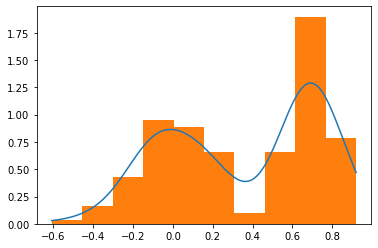

In [25]:
plt.plot(z_g,pdf_k)
plt.hist(z,density=True)

In [26]:
kde_s = KernelDensity(bandwidth = 0.3465).fit(z_s[:, None])
pdf_ks = np.exp(kde_s.score_samples(z_gs[:, None]))

(array([0.01225776, 0.06128882, 0.15935092, 0.35547514, 0.33095961,
        0.24515527, 0.03677329, 0.24515527, 0.71095028, 0.29418632]),
 array([-2.573864  , -2.16595924, -1.75805448, -1.35014973, -0.94224497,
        -0.53434021, -0.12643545,  0.2814693 ,  0.68937406,  1.09727882,
         1.50518358]),
 <a list of 10 Patch objects>)

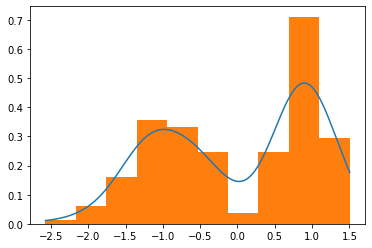

In [27]:
plt.plot(z_gs,pdf_ks)
plt.hist(z_s,density=True)

(array([0.03270228, 0.1635114 , 0.42512965, 0.94836614, 0.88296157,
        0.65404561, 0.09810684, 0.65404561, 1.89673227, 0.78485473]),
 array([-0.60845039, -0.45555585, -0.30266132, -0.14976678,  0.00312775,
         0.15602229,  0.30891683,  0.46181136,  0.6147059 ,  0.76760043,
         0.92049497]),
 <a list of 10 Patch objects>)

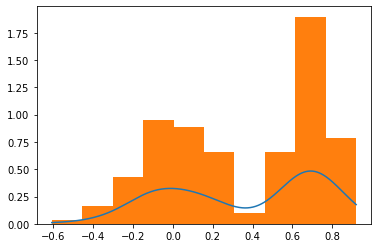

In [28]:
plt.plot(z_g,pdf_ks)
plt.hist(z,density=True)

## 2D

In [29]:
z_g=np.linspace(z.min(),z.max(),30)
z_g2=np.linspace(z2.min(),z2.max(),50)

In [30]:
z_g3=np.linspace(z3.min(),z3.max(),100)

In [31]:
z_s=(z-z.mean())/(z.std())
z2_s=(z2-z2.mean())/(z2.std())

In [32]:
data_example = np.vstack([z_s, z2_s]).T

In [33]:
kde_example = KernelDensity(bandwidth=0.34).fit(data_example)

In [34]:
z_gs=np.linspace(z_s.min(),z_s.max(),30)
z_gs2=np.linspace(z2_s.min(),z2_s.max(),50)

In [35]:
X, Y = np.meshgrid(z_gs, z_gs2)
xy = np.vstack([X.ravel(), Y.ravel()]).T

In [36]:
data_example.shape

(200, 2)

In [37]:
pdf=np.exp(kde_example.score_samples(xy))

In [38]:
pdf=pdf.reshape(50,30)

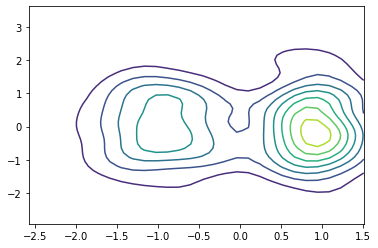

In [39]:
plt.contour(X,Y,pdf)

In [40]:
z_s=(z-z.mean())/(z.std())
z2_s=(z2-z2.mean())/(z2.std())
z3_s=(z3-z3.mean())/(z3.std())

In [97]:
z_gs=np.linspace(z_s.min(),z_s.max(),30)
z_gs2=np.linspace(z2_s.min(),z2_s.max(),50)
z_gs3=np.linspace(z3_s.min(),z3_s.max(),100)

In [98]:
data_example = np.vstack([z_s, z2_s, z3_s]).T

In [99]:
kde_example = KernelDensity(bandwidth=0.34).fit(data_example)

In [100]:
X, Y, Z = np.meshgrid(z_gs, z_gs2,z_gs3)
xyz = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

In [101]:
pdf=np.exp(kde_example.score_samples(xyz))

In [102]:
pdf=pdf.reshape(50,30,100)

In [103]:
Xp, Yp, = np.meshgrid(z_gs, z_gs2)

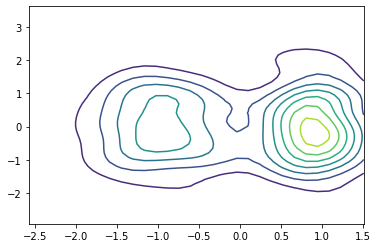

In [104]:
plt.contour(Xp,Yp,pdf.sum(axis=2))

In [105]:
Xo, Yo = np.meshgrid(z_g, z_g2)

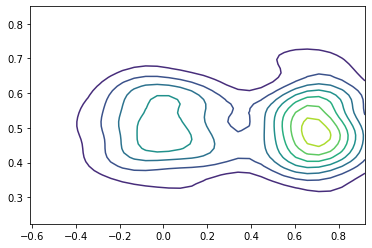

In [106]:
plt.contour(Xo,Yo,pdf.sum(axis=2))

In [107]:
priory = stats.norm.pdf(z_g2,0.55,0.005)

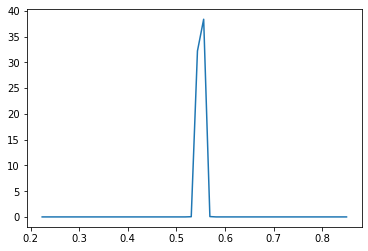

In [108]:
plt.plot(z_g2,priory)

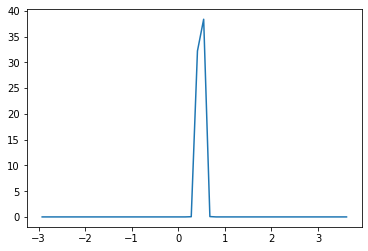

In [109]:
plt.plot(z_gs2,priory)

In [110]:
priorx = stats.norm.pdf(z_g,0.65,0.05)

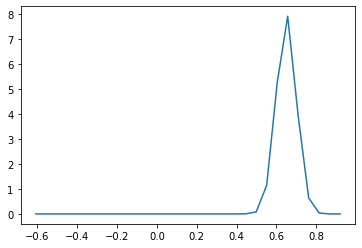

In [111]:
plt.plot(z_g,priorx)

In [112]:
eye = np.ones([50,30])*priorx

In [113]:
eye.T*priory

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
pr2d=((np.ones([50,30]).T*priory).T)*priorx

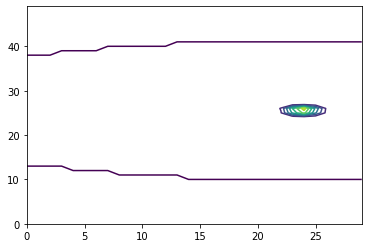

In [115]:
plt.contour(pr2d)

In [116]:
pr2d.sum()

1340.8237594105424

In [117]:
pr2d.sum(axis=0).shape

(30,)

In [118]:
(z_gs[1]-z_gs[0])

0.1406568128923591

In [119]:
norm_pr=(pr2d.sum(axis=0)*(z_gs[1]-z_gs[0])).sum()*(z_gs2[1]-z_gs2[0])
norm_pr

25.144868881718935

In [120]:
pr2d = pr2d/norm_pr
p = pr2d/norm_pr

In [92]:
p.sum()

53.32395112966214

In [93]:
z_g2=np.linspace(z2.min(),z2.max(),50)

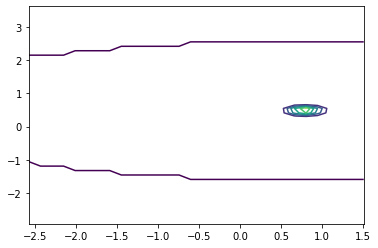

In [94]:
plt.contour(Xp,Yp,pr2d)

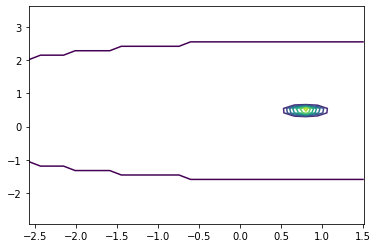

In [67]:
plt.contour(Xp,Yp,pr2d*pdf.sum(axis=2))

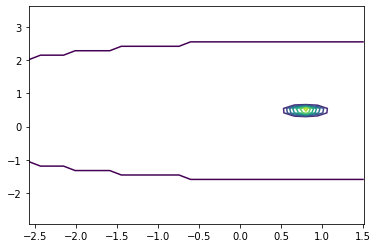

In [68]:
plt.contour(Xp,Yp,((pdf.T*pr2d.T).T).sum(axis=2))

In [69]:
post=(((pdf.T*pr2d.T).T).sum(axis=0)).sum(axis=0)

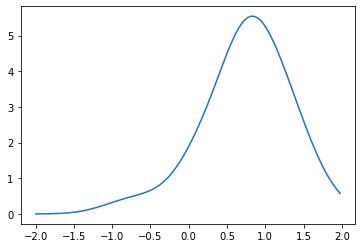

In [70]:
plt.plot(z_gs3,post)

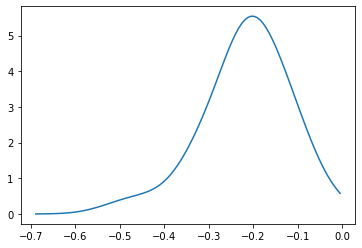

In [71]:
plt.plot(z_g3,post)

In [72]:
pr2d.sum()*(z_g2[1]-z_g2[0])

0.6817024510230257

In [73]:
pdf.T*pr2d.T

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [74]:
plt.contour(X,Y,(pdf.T*prior).T)

NameError: name 'prior' is not defined

In [ ]:
matrix=(pdf.T*prior).T

In [ ]:
post=matrix.sum(axis=0)

In [ ]:
plt.plot(z_gs,post)

In [ ]:
plt.plot(z_g,post)

In [ ]:
post.sum()*(z_g[1]-z_g[0])